**Churn Prediction For Bank Customer**
We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:

**Rownumber**: Row Numbers from 1 to 10000

**Customerid**: A unique ID that identifies each customer.

**Surname**: The customer’s surname.

**Creditscore**: A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

**Geography**: The country from which the customer belongs to.

**Gender**: The customer’s gender: Male, Female

**Age**: The customer’s current age, in years, at the time of being customer.
**Tenure**: The number of years for which the customer has been with the bank.

**Balance**: Bank balance of the customer.
Numofproducts: the number of bank products the customer is utilising.

**Hascrcard**: The number of credit cards given to the customer by the bank.

**Isactivemember**: Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")

**Exited**: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
df=pd.read_csv('/content/drive/MyDrive/deep learning/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#drop unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#check null
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

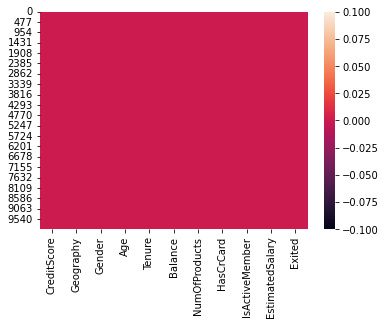

In [ ]:
#visualize null
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#check datatypes
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#check unique values of geography
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#check count of each value
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
#check unique values of gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#check count of each value 
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
#apply label encoder
#convert object into numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df[['Geography']])
df['Gender']=le.fit_transform(df[['Gender']])

In [ ]:
#after applying label encoder
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#here in geography france=0,germany=1 and spain=2
#in gender female=0 and male=1

In [ ]:
#select input and output
X=df.drop('Exited',axis=1)
Y=df['Exited']

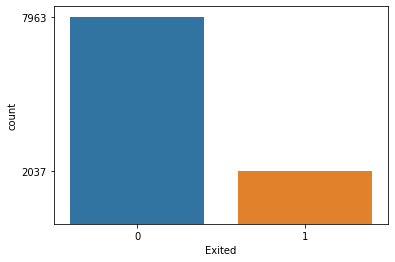

In [ ]:
#visualize target variable Exited
sns.countplot(df['Exited'])
a=df['Exited'].value_counts()
plt.yticks(a)
plt.show()

In [ ]:
#split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
#apply scaling on 80% input data
from sklearn.preprocessing import StandardScaler
#create object
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #only fit method allow train part
X_test=ss.transform(X_test)

In [ ]:
#check total no. of columns of dataset
df.shape[1]

11

In [ ]:
#create neural network
#create object of sequential class and passing the layers in list
import tensorflow as tf

model=tf.keras.models.Sequential([
         #hidden layer 1
         tf.keras.layers.Dense(11,activation='relu',input_shape=(X.shape[1],)),

         #hidden layer 2
         tf.keras.layers.Dense(11,activation='relu'),

          #output layer 
         tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
#check summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                121       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#apply early stopping
#create callback
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=15,
    mode='auto',
    verbose=1,
    baseline=None,
    restore_best_weights=False
)

In [ ]:
#train the model
trained_model=model.fit(X_train,Y_train,batch_size=50,epochs=100,validation_data=(X_train,Y_train),verbose=1,callbacks=callback)

Epoch 1/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5473 - accuracy: 0.7746 - val_loss: 0.4944 - val_accuracy: 0.7972
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7972 - val_loss: 0.4501 - val_accuracy: 0.7972
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.7976 - val_loss: 0.4313 - val_accuracy: 0.7993
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.8041 - val_loss: 0.4203 - val_accuracy: 0.8095
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4165 - accuracy: 0.8181 - val_loss: 0.4100 - val_accuracy: 0.8241
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.8276 - val_loss: 0.4009 - val_accuracy: 0.8307
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8326 - val_loss: 0.3918 - val_accuracy: 0.8357

In [ ]:
#bias of input layer
model.layers[0].get_weights()

[array([[ 0.00683023,  0.25394362,  0.04227613,  0.15850985,  0.0519904 ,
         -0.07175022,  0.13771181,  0.00646421, -0.02536731, -0.27037495,
          0.04643519],
        [-0.03179653, -0.27446076,  0.5939319 ,  0.00714869, -0.49641368,
         -0.19696662, -0.00967068, -0.6010763 , -1.0185609 ,  0.27023178,
         -0.31785467],
        [ 0.10634063,  0.11039556,  0.21119335,  0.36753237,  0.23641208,
          0.25978863,  0.52364755,  0.02581543,  0.1979592 ,  0.01767792,
          0.04926983],
        [ 0.2503939 ,  0.07799007, -0.7168302 , -0.15969208,  0.8400206 ,
          0.09306943,  0.34264612,  0.26261696, -0.72349507,  1.4246004 ,
          0.27360177],
        [ 0.01441463,  0.41390964,  0.12470879,  0.01695547,  0.20203538,
          0.1170667 ,  0.11295835, -0.07582285, -0.03669759, -0.10736782,
          0.03623737],
        [-0.03893116, -0.9575729 , -0.14478944, -0.5238265 , -0.3562412 ,
         -0.00647483, -0.21422648, -0.03476287,  0.52089614,  0.2751109

In [ ]:
#bias of output layers
model.layers[2].get_weights()

[array([[ 1.2763968 ],
        [-0.55081064],
        [-1.1232089 ],
        [-0.2388073 ],
        [-0.88054234],
        [-0.6680212 ],
        [ 0.21753995],
        [ 1.0299408 ],
        [-0.17005354],
        [-0.6880768 ],
        [ 0.7217668 ]], dtype=float32), array([-0.09662011], dtype=float32)]

In [ ]:
#check error and accuracy of testing and training 
model.evaluate(X_train,Y_train)
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8685


[0.3316313624382019, 0.8684999942779541]

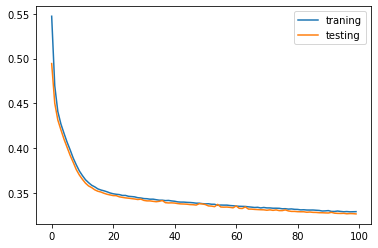

In [ ]:
#visualize error of training and testing
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.legend(['traning','testing'],loc='upper right')
plt.show()

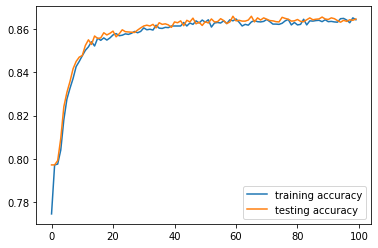

In [ ]:
#visualise training accuracy and testing accuracy
plt.plot(trained_model.history['accuracy'],label='training accuracy') #training's accuracy
plt.plot(trained_model.history['val_accuracy'],label='testing accuracy') #testing's accuracy
plt.legend()
plt.show()

In [ ]:
Y_pred=model.predict(X_test)
for i in Y_pred:
  print(np.round(i,2))
Y_pred

[0.02]
[0.11]
[0.05]
[0.03]
[0.08]
[0.01]
[0.17]
[0.06]
[0.01]
[0.03]
[0.17]
[0.22]
[0.05]
[0.05]
[0.12]
[0.11]
[0.01]
[0.07]
[0.02]
[0.56]
[0.21]
[0.02]
[0.28]
[0.14]
[0.09]
[0.02]
[0.45]
[0.16]
[0.33]
[0.09]
[0.05]
[0.06]
[0.13]
[0.94]
[0.11]
[0.12]
[0.34]
[0.57]
[0.06]
[0.46]
[0.18]
[0.81]
[0.26]
[0.02]
[0.04]
[0.04]
[0.05]
[0.27]
[0.02]
[0.23]
[0.06]
[0.8]
[0.02]
[0.01]
[0.71]
[0.11]
[0.34]
[0.09]
[0.35]
[0.21]
[0.15]
[0.12]
[0.02]
[0.72]
[0.14]
[0.01]
[0.18]
[0.04]
[0.01]
[0.36]
[0.13]
[0.12]
[0.04]
[0.02]
[0.61]
[0.43]
[0.02]
[0.01]
[0.13]
[0.01]
[0.03]
[0.3]
[0.01]
[0.09]
[0.35]
[0.03]
[0.14]
[0.05]
[0.2]
[0.21]
[0.01]
[0.08]
[0.02]
[0.15]
[0.04]
[0.44]
[0.08]
[0.04]
[0.63]
[0.08]
[0.06]
[0.16]
[0.1]
[0.34]
[0.28]
[0.01]
[0.02]
[0.12]
[0.02]
[0.03]
[0.54]
[0.3]
[0.01]
[0.6]
[0.12]
[0.04]
[0.06]
[0.01]
[0.89]
[0.01]
[0.01]
[0.17]
[0.68]
[0.03]
[0.16]
[0.05]
[0.17]
[0.33]
[0.14]
[0.08]
[0.02]
[0.29]
[0.03]
[0.02]
[0.43]
[0.08]
[0.19]
[0.7]
[1.]
[0.01]
[0.06]
[0.32]
[0.22]
[0.14]
[

array([[0.02147049],
       [0.11407647],
       [0.04537109],
       ...,
       [0.00922945],
       [0.04846564],
       [0.32577786]], dtype=float32)

In [ ]:
#convert value above 0.5 to 1 and less than 0.5 to 0 using where function
#syntax :np.where(condition,true,false)
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
#Evaluation for classification
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.78      0.51      0.61       415

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000

[[1527   58]
 [ 205  210]]


In [ ]:
#here is too much difference in training and testing score bcoz the data is unbalanced
#We handle Imbalance data ,We take some Samling Technique.
''' There are 2 types of Sampling Technique : -
1. Random Over Sampling TEchnique  2.Random Under Sampling TEchnique'''



#If you have basically reducing the majority class means 
#remove record randomly from majority class that is known as 
#Random Undersampling ,
#and if you are increasing the minority class means create a duplicate
#row randomly that is known as Random over sampling


' There are 2 types of Sampling Technique : -\n1. Random Over Sampling TEchnique  2.Random Under Sampling TEchnique'

In [ ]:
#check the output is balanced or not.
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#create object
ros= RandomOverSampler()
#fit_resample() inbuilt method of RandomOverSampler class
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [ ]:
#check if balance after applying randomoversampling
pd.Series(Y_train_ros).value_counts()
#here we make minority equal to majority

0    6378
1    6378
Name: Exited, dtype: int64

In [ ]:
#check if not balance
pd.Series(Y_train).value_counts()

0    6378
1    1622
Name: Exited, dtype: int64

In [ ]:
#Apply randomoversampling on 20% testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [ ]:
#check if not balance
pd.Series(Y_test).value_counts()

0    1585
1     415
Name: Exited, dtype: int64

In [ ]:
#check if balance after applying sampling
pd.Series(Y_test_ros).value_counts()

0    1585
1    1585
Name: Exited, dtype: int64

In [ ]:
#apply scaling on 80% input data
from sklearn.preprocessing import StandardScaler
#create object
ss=StandardScaler()
X_train_ros=ss.fit_transform(X_train_ros) #only fit method allow train part
X_test_ros=ss.transform(X_test_ros)

In [ ]:
#create neural network
#create object of sequential class and passing the layers in list
import tensorflow as tf

model=tf.keras.models.Sequential([
         #hidden layer 1
         tf.keras.layers.Dense(11,activation='relu',input_shape=(X.shape[1],)),

         #hidden layer 2
         tf.keras.layers.Dense(11,activation='relu'),

          #output layer 
         tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [ ]:
#train the model
trained_model=model.fit(X_train_ros,Y_train_ros,batch_size=50,epochs=100,validation_data=(X_train_ros,Y_train_ros),verbose=1,callbacks=callback)

Epoch 1/100
256/256 [==============================] - 1s 3ms/step - loss: 0.6575 - accuracy: 0.6182 - val_loss: 0.6053 - val_accuracy: 0.7025
Epoch 2/100
256/256 [==============================] - 1s 3ms/step - loss: 0.5713 - accuracy: 0.7236 - val_loss: 0.5431 - val_accuracy: 0.7343
Epoch 3/100
256/256 [==============================] - 1s 3ms/step - loss: 0.5280 - accuracy: 0.7407 - val_loss: 0.5126 - val_accuracy: 0.7503
Epoch 4/100
256/256 [==============================] - 1s 3ms/step - loss: 0.5070 - accuracy: 0.7508 - val_loss: 0.4989 - val_accuracy: 0.7542
Epoch 5/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.7552 - val_loss: 0.4908 - val_accuracy: 0.7574
Epoch 6/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4898 - accuracy: 0.7567 - val_loss: 0.4859 - val_accuracy: 0.7595
Epoch 7/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4852 - accuracy: 0.7549 - val_loss: 0.4812 - val_accuracy: 0.7603

In [ ]:
#check error and accuracy of testing and training 
print("Training Error and Training Accuracy of Training Data : ",
      model.evaluate(X_train_ros, Y_train_ros) )
print("Testing Error and Testing Accuracy of Testing Data : ",
      model.evaluate(X_test_ros, Y_test_ros) )

399/399 [==============================] - 1s 1ms/step - loss: 0.4279 - accuracy: 0.7960
Training Error and Training Accuracy of Training Data :  [0.4278697967529297, 0.796017587184906]
100/100 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7842
Testing Error and Testing Accuracy of Testing Data :  [0.455973744392395, 0.7842271327972412]


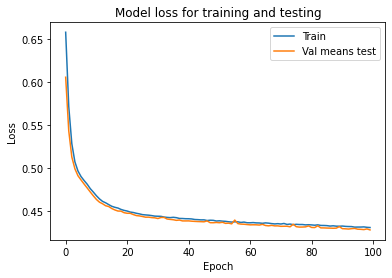

In [ ]:
#visualise training error(loss) and testing error (loss)
plt.plot(trained_model.history['loss']) #training's loss means error
plt.plot(trained_model.history['val_loss']) #testing's loss means error
plt.title('Model loss for training and testing')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

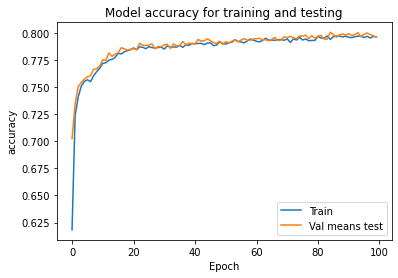

In [ ]:
#visualise training accuracy and testing accuracy
plt.plot(trained_model.history['accuracy']) #training's accuracy
plt.plot(trained_model.history['val_accuracy']) #testing's accuracy
plt.title('Model accuracy for training and testing')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='lower right')#loc means location
plt.show()

In [ ]:
#test the model
Y_pred=model.predict(X_test_ros)
Y_pred

array([[0.27502918],
       [0.25361705],
       [0.31756076],
       ...,
       [0.8937017 ],
       [0.9971237 ],
       [0.8917177 ]], dtype=float32)

In [ ]:
#convert value above 0.5 to 1 and less than 0.5 to 0 using where function
#syntax :np.where(condition,true,false)
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#Evaluation for classification
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(Y_test_ros,Y_pred))
print(confusion_matrix(Y_test_ros,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1585
           1       0.80      0.75      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.79      0.78      0.78      3170
weighted avg       0.79      0.78      0.78      3170

[[1295  290]
 [ 394 1191]]


In [ ]:
#model is overfit bcoz training error<testing error
#accuracy for training 79% and testing:76%

In [ ]:
#to reduce overfitting
#1.regularization(lasso and ridge)

In [ ]:
from keras import regularizers
#create neural network
#create object of sequential class and passing the layers in list

model=tf.keras.Sequential([
      tf.keras.layers.Dense(units=32,activation='relu',
        input_shape=(X.shape[1],),
         kernel_regularizer=regularizers.l2(0.01)), #first hidden layer
tf.keras.layers.Dense(units=32,activation='relu',
  kernel_regularizer=regularizers.l2(0.01)), #Second hidden layer
  tf.keras.layers.Dense(1,activation='sigmoid',
    kernel_regularizer=regularizers.l2(0.01))   #output layer    
])


In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
trained_model=model.fit(X_train_ros,Y_train_ros,batch_size=50,epochs=100,validation_data=(X_train_ros,Y_train_ros),verbose=0,callbacks=callback)

Epoch 95: early stopping


In [ ]:
print("Training Error and Training Accuracy of Training Data : ",
      model.evaluate(X_train_ros, Y_train_ros) )
print("Testing Error and Testing Accuracy of Testing Data : ",
      model.evaluate(X_test_ros, Y_test_ros) )

399/399 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.7516
Training Error and Training Accuracy of Training Data :  [0.5735021829605103, 0.7516462802886963]
100/100 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7653
Testing Error and Testing Accuracy of Testing Data :  [0.5631957054138184, 0.7652996778488159]


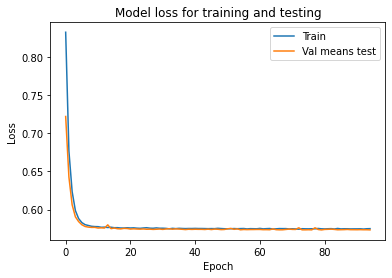

In [ ]:
#visualise training error(loss) and testing error (loss)
plt.plot(trained_model.history['loss']) #training's loss means error
plt.plot(trained_model.history['val_loss']) #testing's loss means error
plt.title('Model loss for training and testing')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

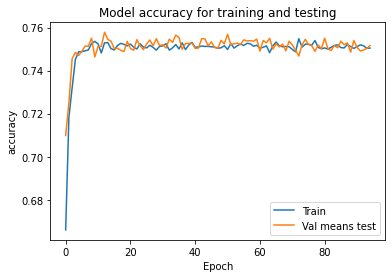

In [ ]:
#visualise training accuracy and testing accuracy
plt.plot(trained_model.history['accuracy']) #training's accuracy
plt.plot(trained_model.history['val_accuracy']) #testing's accuracy
plt.title('Model accuracy for training and testing')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='lower right')#loc means location
plt.show()

In [ ]:
#test the model
Y_pred=model.predict(X_test_ros)
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#Evaluation for classification
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(Y_test_ros,Y_pred))
print(confusion_matrix(Y_test_ros,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1585
           1       0.76      0.78      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1196  389]
 [ 355 1230]]


In [ ]:
#score is still not good after applying ridge 

In [ ]:
#now apply 2nd technique to reduce overfit
#Apply Dropout
from keras.layers import Dropout
model=tf.keras.Sequential([
      tf.keras.layers.Dense(units=16,activation='relu',
        input_shape=(X.shape[1],)), #first hidden layer
        Dropout(0.25), #50% neurons deactivate
tf.keras.layers.Dense(units=16,activation='relu'), #Second hidden layer
     Dropout(0.25),
tf.keras.layers.Dense(units=16,activation='relu'), #Third hidden layer
Dropout(0.25),
  tf.keras.layers.Dense(1,activation='sigmoid')   #output layer    
])

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [ ]:
#train the model
trained_model=model.fit(X_train_ros,Y_train_ros,batch_size=50,epochs=100,validation_data=(X_train_ros,Y_train_ros),verbose=0,callbacks=callback)

Epoch 87: early stopping


In [ ]:
#check error and accuracy of testing and training 
print("Training Error and Training Accuracy of Training Data : ",
      model.evaluate(X_train_ros, Y_train_ros) )
print("Testing Error and Testing Accuracy of Testing Data : ",
      model.evaluate(X_test_ros, Y_test_ros) )

399/399 [==============================] - 1s 1ms/step - loss: 0.4577 - accuracy: 0.7731
Training Error and Training Accuracy of Training Data :  [0.45771849155426025, 0.7731263637542725]
100/100 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7817
Testing Error and Testing Accuracy of Testing Data :  [0.47020190954208374, 0.7817034721374512]


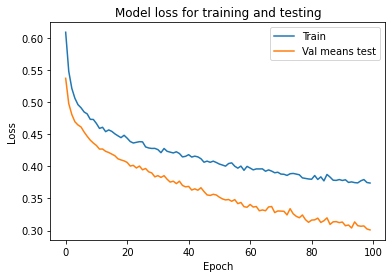

In [ ]:
#visualise training error(loss) and testing error (loss)
plt.plot(trained_model.history['loss']) #training's loss means error
plt.plot(trained_model.history['val_loss']) #testing's loss means error
plt.title('Model loss for training and testing')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

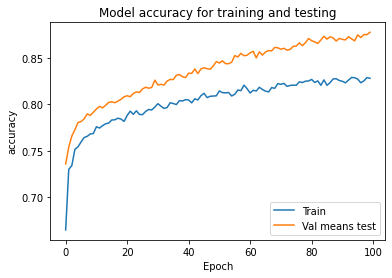

In [ ]:
#visualise training accuracy and testing accuracy
plt.plot(trained_model.history['accuracy']) #training's accuracy
plt.plot(trained_model.history['val_accuracy']) #testing's accuracy
plt.title('Model accuracy for training and testing')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='lower right')#loc means location
plt.show()

In [ ]:
#test the model
Y_pred=model.predict(X_test_ros)
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#Evaluation for classification
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(Y_test_ros,Y_pred))
print(confusion_matrix(Y_test_ros,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1585
           1       0.78      0.79      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

[[1233  352]
 [ 340 1245]]


**Conclusion**


**1**.Implemented basic steps to see how data looks like,

**2**.Checked for missing values,

**3.** Dropped the features that not suitable for modelling,

**4.**Implemented basic visualization steps such as histogram, countplot, heatmap,

**5**.Converted categorical variables to dummy variables,

**6**.Created models with Keras,
And  made prediction with model.